<a href="https://colab.research.google.com/github/riken-emar/RandomForest/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ランダムフォレストを可視化
#https://happy-analysis.com/python/python-topic-tree-importance.html

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

sns.set_style('whitegrid',{'linestyle.grid':'--'})
%matplotlib inline

In [4]:
data=load_iris()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# data
data.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
# 特徴量の列名
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# target
data.target[0:5]

array([0, 0, 0, 0, 0])

In [10]:
# 目的変数の実際の値
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# 説明変数と目的変数
X=data.data
y=data.target

# 訓練データ(train)と検証データ(test)にわける 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [12]:
# モデルの作成
clf = DecisionTreeClassifier(max_depth=3) 

# モデルの学習
clf.fit(X_train, y_train)


# 評価
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9809523809523809
0.9555555555555556


In [14]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 961 kB/s 


/usr/local/lib/python3.8/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.8/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 39006 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39006 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 39006 missing from current font.
  font.set_text(s, 

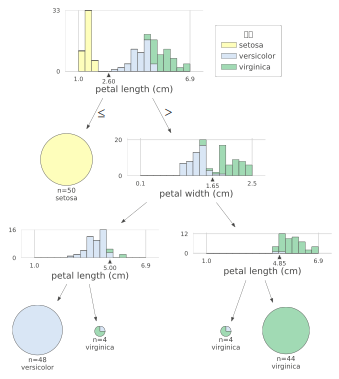

In [15]:
# ライブラリのインポート
from dtreeviz.trees import dtreeviz

viz=dtreeviz(clf,X,y,
            feature_names=data.feature_names,
            target_name='種類',
            class_names=list(data.target_names),
)

display(viz)

In [16]:
# モデルの作成
rf = RandomForestClassifier(max_depth=4, random_state=1) 

# モデルの学習
rf.fit(X_train, y_train)

# 評価
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9904761904761905
0.9555555555555556


/usr/local/lib/python3.8/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.8/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 39006 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39006 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 39006 missing from current font.
  font.set_text(s, 

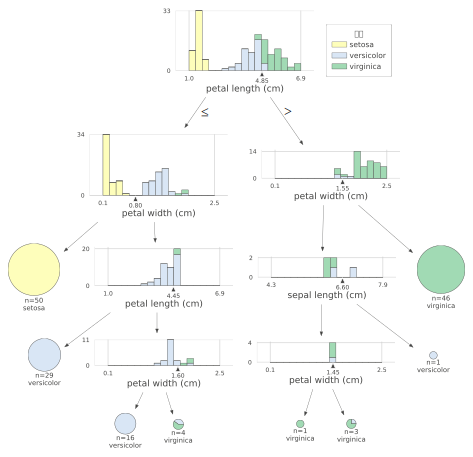

In [17]:
# 複数の決定木があるため、先頭から2番目の決定木を可視化
estimators = rf.estimators_
viz = dtreeviz(
    estimators[1],X,y,
    target_name='種類',
    feature_names=data.feature_names,
    class_names=list(data.target_names),
) 

display(viz)
viz.save('randomforest.svg')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Importance')

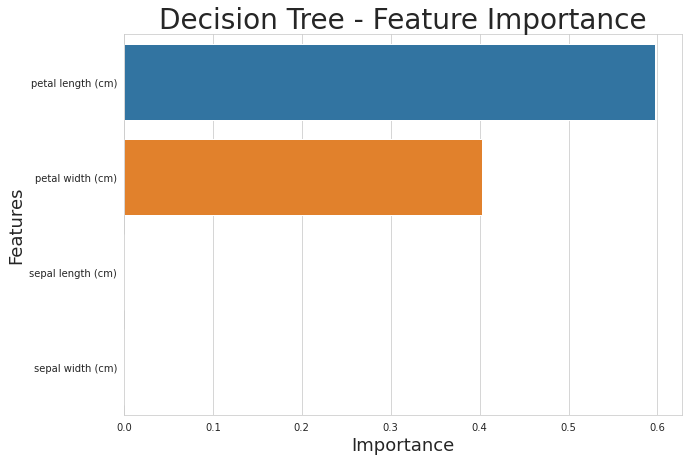

In [18]:
# 決定木の説明変数の重要度をデータフレーム化
fea_clf_imp = pd.DataFrame({'imp': clf.feature_importances_, 'col': data.feature_names})
fea_clf_imp = fea_clf_imp.sort_values(by='imp', ascending=False)

# 決定木の重要度を可視化
plt.figure(figsize=(10, 7))
sns.barplot('imp','col',data=fea_clf_imp,orient='h')
plt.title('Decision Tree - Feature Importance',fontsize=28)
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importance',fontsize=18)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Importance')

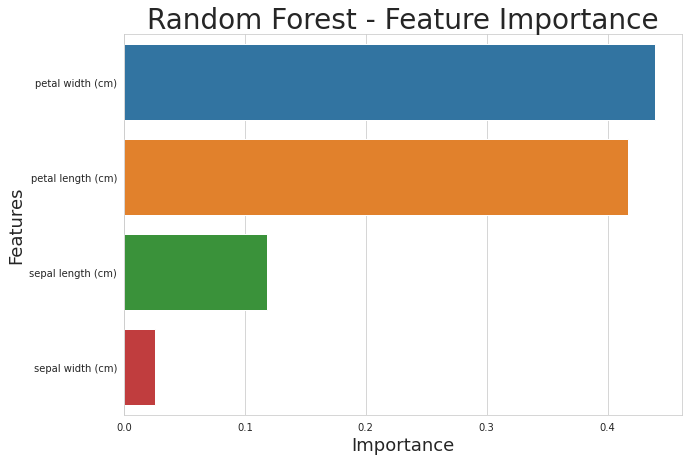

In [19]:
# ランダムフォレストの説明変数の重要度をデータフレーム化
fea_rf_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': data.feature_names})
fea_rf_imp = fea_rf_imp.sort_values(by='imp', ascending=False)

# ランダムフォレストの重要度を可視化
plt.figure(figsize=(10, 7))
sns.barplot('imp','col',data=fea_rf_imp,orient='h')
plt.title('Random Forest - Feature Importance',fontsize=28)
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importance',fontsize=18)